In [1]:
import os
import time
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
data_prefix = '.'

In [2]:
from scipy.stats import spearmanr
def vector_length(u):
    """Length (L2) of the 1d np.array `u`. Returns a new np.array with the 
    same dimensions as `u`."""
    return np.sqrt(np.dot(u, u))
  
def cosine(u, v):        
    """Cosine distance between 1d np.arrays `u` and `v`, which must have 
    the same dimensionality. Returns a float."""
    return 1.0 - (np.dot(u, v) / (vector_length(u) * vector_length(v)))

def evaluate_word_similarity(word_pairs, targets, mat, tok2idx):
    """ 
    similarity = 1 - cosine distance 
    """
    preds = []
    trgs = []
    n_exs = 0
    for (word1, word2), trg in zip(word_pairs, targets):
        if word1 in tok2idx and word2 in tok2idx:
            pred_sim = 1 - cosine(mat[tok2idx[word1]], mat[tok2idx[word2]])
            preds.append(pred_sim)
            trgs.append(trg)
            n_exs += 1
    
    rho, pvalue = spearmanr(trgs, preds)
    print("Evaluated on %d of %d examples" % (n_exs, len(word_pairs)))
    return rho

def prob_norm(u):
    """Normalize 1d np.array `u` into a probability distribution. Assumes 
    that all the members of `u` are positive. Returns a 1d np.array of 
    the same dimensionality as `u`."""
    return u / np.sum(u)

def rowwise_norm_mat(mat):
    return np.array([prob_norm(u) for u in mat])

In [3]:
def analogy_completion(a, b, c, mat):
    """Compute ? in 
    a is to b as c is to ? 
    as the closest to (b-a) + c
    """
    
    temp = (mat[b]-mat[a])+mat[c]
    result_dict = dict()
    for key, value in mat.items():
        if key not in [a, b, c]:
            dist = cosine(value, temp)
            assert 0 <= dist <= 2
            result_dict[key] = dist
    sorted_by_value = sorted(result_dict.items(), key=lambda kv: kv[1])
    
    return sorted_by_value

In [4]:
def load_glove(glove_file, n_vecs=20000):
    """ 
    from lab
    """
    tok2vec = {}
    with open(glove_file, 'r', encoding="utf-8") as glove_fh:
        for i, row in enumerate(glove_fh):
            word, vec = row.split(' ', 1)
            tok2vec[word] = np.array([float(n) for n in vec.split(' ')])
            if i >= n_vecs:
                break
    return tok2vec

In [5]:
# We load first 50k glove vectors only since the entire file is large
glove_file = "glove.840B.300d.txt"
glove_vecs = load_glove(os.path.join("D:\InferSent\dataset\GloVe",glove_file), n_vecs=50000)

In [6]:
analogy_completion("three", "two", "eight", glove_vecs)[:10]

[('four', 0.06799477642530904),
 ('six', 0.07338646562633411),
 ('five', 0.10075461782253747),
 ('nine', 0.1096633953702365),
 ('seven', 0.11194106492072553),
 ('eleven', 0.20282183228079265),
 ('twelve', 0.21769454310009329),
 ('sixteen', 0.2435397675103136),
 ('ten', 0.2480361406374455),
 ('fourteen', 0.2535325773447502)]

In [33]:
num_words = ['a', 'one', 'two', 'three', 'four',
    'five', 'six', 'seven', 'eight', 'nine',
    'ten', 'eleven', 'twelve', 'thirteen', 'fourteen',
    'fifteen', 'sixteen', 'seventeen', 'eighteen', 'nineteen',
    'twenty', 'thirty', 'forty',
    'fifty', 'sixty', 'seventy', 'eighty', 'ninety', 
    'hundred', 'thousand', 'million', 'billion', 'trillion',
    'hundreds', 'thousands', 'million', 'billions', 'trillions',
    #'quadrillion', 'quintillion', 'sextillion', 'septillion', 'octillion'
]
num_words.extend([str(i) for i in range(100)])

In [30]:
import tqdm
def similar_vectors(vector_list, mat):
    vector_set = set(vector_list)
    result_dict = dict()
    for key, value in tqdm.tqdm(mat.items()):
        if key not in vector_set:
            current_min_dist = 2
            for a in vector_list:
                dist = cosine(value, mat[a])
                if current_min_dist > dist:
                    current_min_dist = dist
            result_dict[key] = dist
    sorted_by_value = sorted(result_dict.items(), key=lambda kv: kv[1])
            
    return sorted_by_value

In [34]:
neighbors = similar_vectors(num_words, glove_vecs)

100%|███████████████████████████████████████████████████████████████████████████| 50001/50001 [00:50<00:00, 991.47it/s]


In [35]:
neighbors[:500]

[('119', 0.32204127579327757),
 ('109', 0.32846308844134453),
 ('113', 0.33753099064327186),
 ('117', 0.3378227096414025),
 ('107', 0.342280232538705),
 ('103', 0.34853743180984087),
 ('105', 0.3509265482635937),
 ('115', 0.3629555944082443),
 ('118', 0.3672193020085801),
 ('127', 0.3673421393552093),
 ('129', 0.368717165945074),
 ('111', 0.37482329320377694),
 ('124', 0.3773335707995734),
 ('121', 0.3782512540798575),
 ('116', 0.3786068530791832),
 ('104', 0.38434749539303903),
 ('123', 0.38638968756911807),
 ('108', 0.3872649373987388),
 ('126', 0.38798361730799036),
 ('114', 0.39008757940548144),
 ('106', 0.39018771933581653),
 ('110', 0.39742746723301137),
 ('149', 0.3974445338085707),
 ('139', 0.4034960079628467),
 ('125', 0.40413072810041395),
 ('122', 0.4041523078059903),
 ('199', 0.40572810025568173),
 ('112', 0.40871385095464197),
 ('137', 0.4117942390013105),
 ('102', 0.41279889025498306),
 ('159', 0.4205982447887432),
 ('135', 0.42435323046462203),
 ('147', 0.429430053194936

In [85]:
def display_num_words_tsnescatterplot(num_words, neighbors, model):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = []
    words = []
    
    print("add num words")
    for word in num_words:
        wrd_vector = model[word]
        word_labels.append(1)
        words.append(word)
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
    
    print("add neighbors")
    for word, wrd_score in neighbors:
        wrd = model[word]
        word_labels.append(0)
        words.append(word)
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    cmap = matplotlib.cm.get_cmap('viridis')
    normalize = matplotlib.colors.Normalize(vmin=min(word_labels), vmax=max(word_labels))
    colors = [cmap(normalize(value)) for value in word_labels]

    # find tsne coords for 2 dimensions
    print("find TSNE")
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    print("plotting")
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    fig, ax = plt.subplots(figsize=(16,16))
    ax.scatter(x_coords, y_coords, color=colors)

    for label, x, y in zip(words, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

add num words
add neighbors
find TSNE
plotting


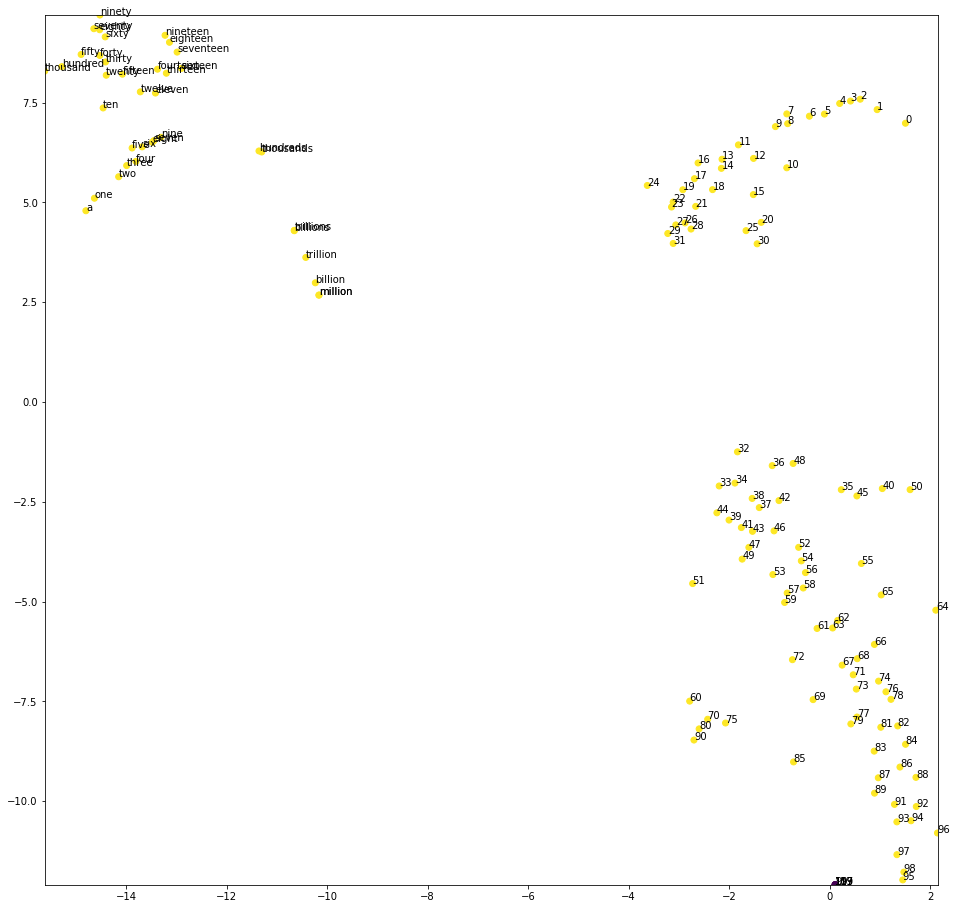

In [88]:
display_num_words_tsnescatterplot(num_words, neighbors[:5], glove_vecs)

add num words
add neighbors
find TSNE
plotting


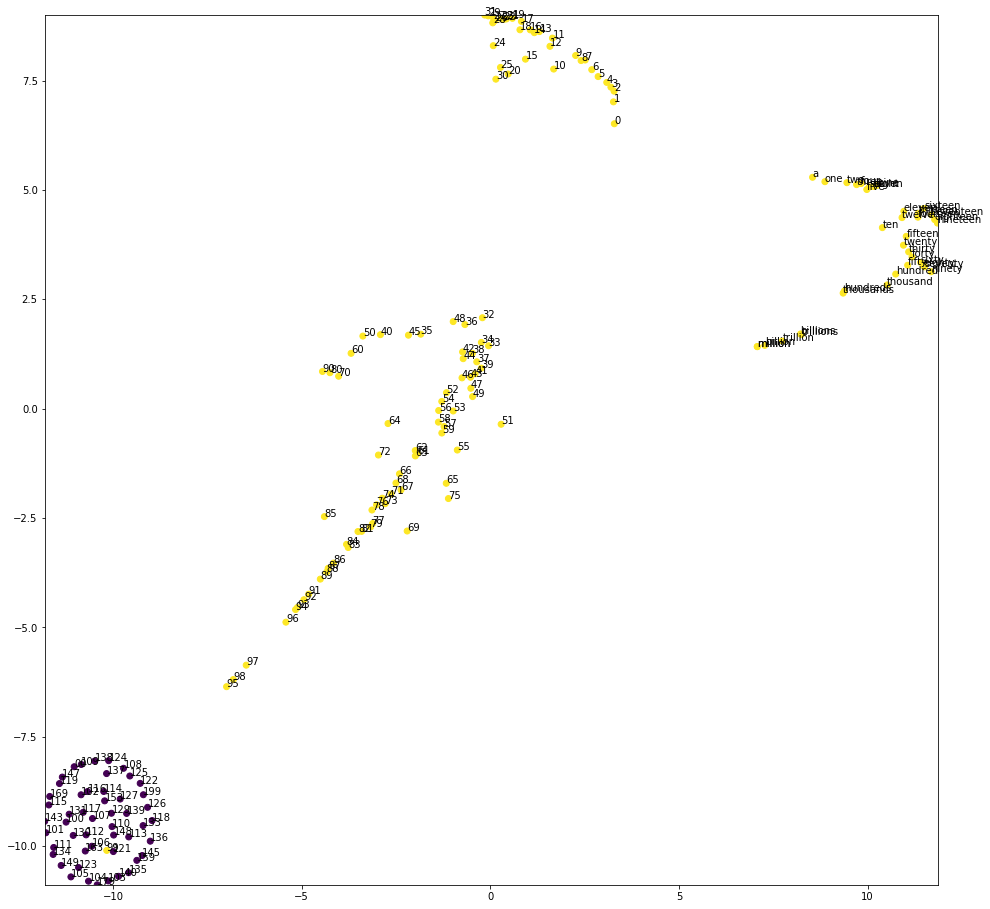

In [89]:
display_num_words_tsnescatterplot(num_words, neighbors[:50], glove_vecs)

add num words
add neighbors
find TSNE
plotting


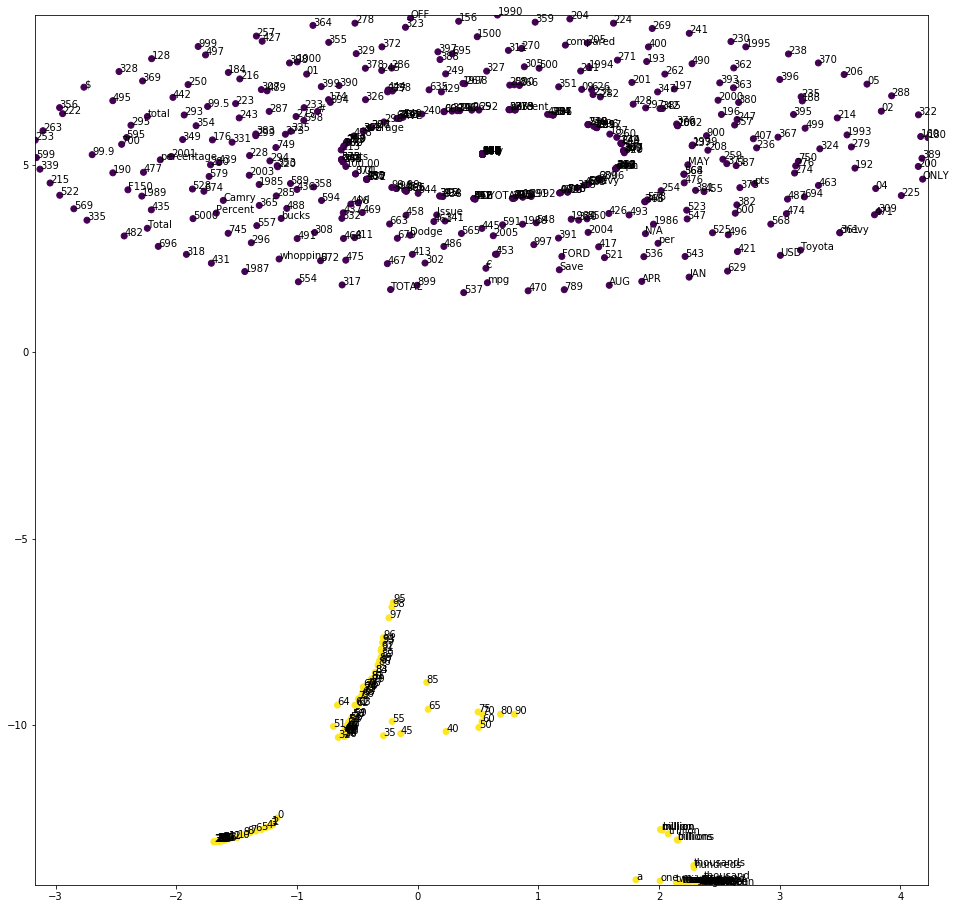

In [87]:
display_num_words_tsnescatterplot(num_words, neighbors[:500], glove_vecs)